# 6.4 Supervised Macine Learning: Regression

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [4]:
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [5]:
# Import us_births.csv

us_births = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'us_births_cleaned_2.csv'), index_col = False)

## 2. Data cleaning

In [6]:
us_births.columns

Index(['Unnamed: 0', 'State', 'State_abbrev', 'Year', 'Gender_baby',
       'Education_level', 'Education_code', 'Births', 'Avg_age_mother',
       'Avg_birth_weight(g)'],
      dtype='object')

In [7]:
us_births.head(20)

,Unnamed: 0,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
5,5,Alabama,AL,2016,F,"Bachelor's degree (BA, AB, BS)",6,4453,30.3,3239.0
6,6,Alabama,AL,2016,F,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,1910,32.0,3263.5
7,7,Alabama,AL,2016,F,"Doctorate (PhD, EdD) or Professional Degree (M...",8,487,33.1,3196.7
8,8,Alabama,AL,2016,F,Unknown or Not Stated,9,65,27.7,3083.9
9,9,Alabama,AL,2016,M,8th grade or less,1,1188,27.6,3232.9


In [8]:
# Drop unnamed column

us_births = us_births.drop(columns = ['Unnamed: 0'])

In [9]:
us_births.head()

,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [10]:
# While there is no missing data, education code = 9 is unknown or not stated. For this analysis I will drop education_code = 9.
us_births.drop(us_births[us_births['Education_code'] == 9].index, inplace = True)
print(us_births)

        State State_abbrev  Year Gender_baby  \
0     Alabama           AL  2016           F   
1     Alabama           AL  2016           F   
2     Alabama           AL  2016           F   
3     Alabama           AL  2016           F   
4     Alabama           AL  2016           F   
...       ...          ...   ...         ...   
5490  Wyoming           WY  2021           M   
5491  Wyoming           WY  2021           M   
5492  Wyoming           WY  2021           M   
5493  Wyoming           WY  2021           M   
5494  Wyoming           WY  2021           M   

                                        Education_level  Education_code  \
0                                     8th grade or less               1   
1                9th through 12th grade with no diploma               2   
2                 High school graduate or GED completed               3   
3                 Some college credit, but not a degree               4   
4                             Associate degree (

In [11]:
us_births.shape

(4896, 9)

In [12]:
us_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 0 to 5494
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                4896 non-null   object 
 1   State_abbrev         4896 non-null   object 
 2   Year                 4896 non-null   int64  
 3   Gender_baby          4896 non-null   object 
 4   Education_level      4896 non-null   object 
 5   Education_code       4896 non-null   int64  
 6   Births               4896 non-null   int64  
 7   Avg_age_mother       4896 non-null   float64
 8   Avg_birth_weight(g)  4896 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 382.5+ KB


In [13]:
# Check for missing value
us_births.isnull().sum()

State                  0
State_abbrev           0
Year                   0
Gender_baby            0
Education_level        0
Education_code         0
Births                 0
Avg_age_mother         0
Avg_birth_weight(g)    0
dtype: int64

#### no missing values

In [14]:
# Checking for duplicates

dups = us_births.duplicated()

In [15]:
dups.shape

(4896,)

#### no duplicates

/var/folders/x7/xxbpt4416fz0ffkv1ft07lnr0000gn/T/ipykernel_84453/2225764897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(us_births['Avg_age_mother'], bins=25) # Shows extreme values


<Axes: xlabel='Avg_age_mother', ylabel='Density'>

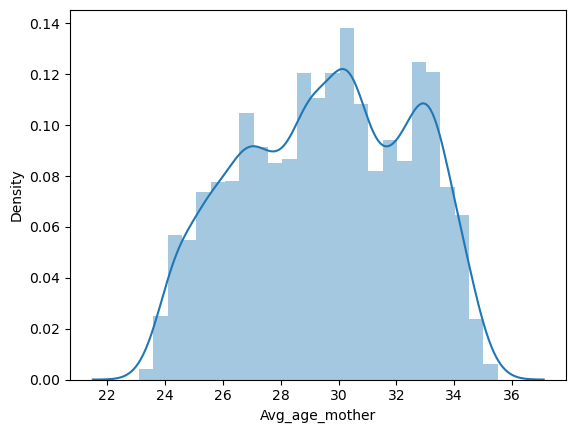

In [16]:
# Extreme value checks

sns.distplot(us_births['Avg_age_mother'], bins=25) # Shows extreme values

In [17]:
us_births['Avg_age_mother'].mean() 

29.575878267973856

In [18]:
us_births['Avg_age_mother'].median() 

29.7

In [19]:
us_births['Avg_age_mother'].max() 

35.5

## 3. Data prep for regression analysis

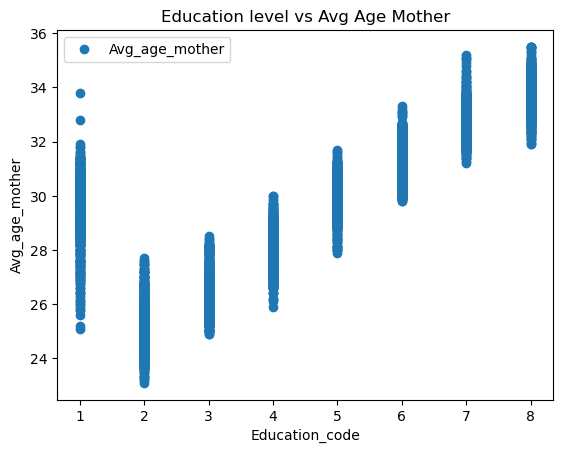

In [20]:
# Making a scatterplot of education_code and avg_age_mother

us_births.plot(x = 'Education_code', y = 'Avg_age_mother',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Education level vs Avg Age Mother')  
plt.xlabel('Education_code')  
plt.ylabel('Avg_age_mother')  
plt.show()

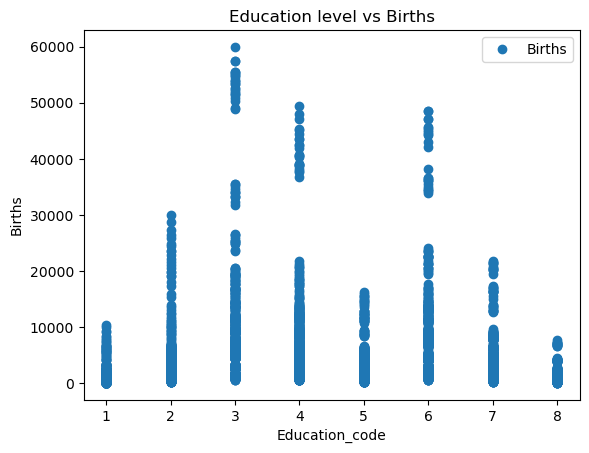

In [21]:
# Making a scatterplot of education_code and births

us_births.plot(x = 'Education_code', y = 'Births',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Education level vs Births')  
plt.xlabel('Education_code')  
plt.ylabel('Births')  
plt.show()

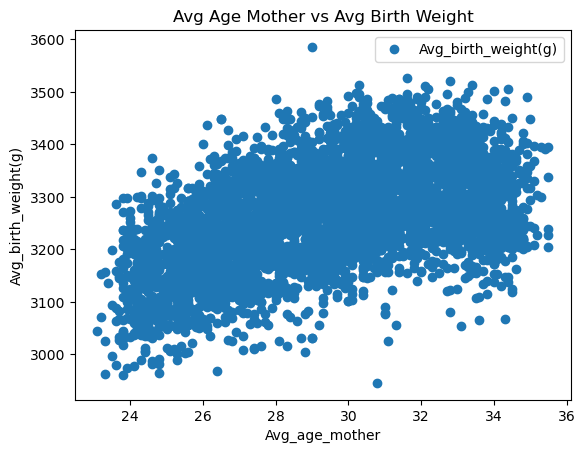

In [23]:
# Making a scatterplot of avg_age_mother and avg_birth_weight

us_births.plot(x = 'Avg_age_mother', y = 'Avg_birth_weight(g)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Avg Age Mother vs Avg Birth Weight')  
plt.xlabel('Avg_age_mother')  
plt.ylabel('Avg_birth_weight(g)')  
plt.show()

### Hypothesis to test: The older a woman is the higher level of education they will have.

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = us_births['Education_code'].values.reshape(-1,1)
y = us_births['Avg_age_mother'].values.reshape(-1,1)

In [26]:
X

array([[1],
       [2],
       [3],
       ...,
       [6],
       [7],
       [8]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [28]:
# Create a regression object

regression = LinearRegression()

In [29]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the valyes of y using X.

y_predicted = regression.predict(X_test)

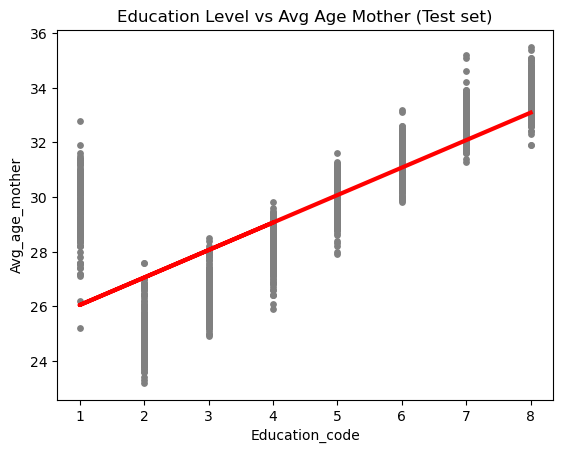

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Education Level vs Avg Age Mother (Test set)')
plot_test.xlabel('Education_code')
plot_test.ylabel('Avg_age_mother')
plot_test.show()

#### I think the regression line semi-accurately fits to the test set. For instance, it misses a lot of the education 1 points (probably because that is education 8th grade and less which majority of woman regardless of age complete before they have a child). 

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.0060374]]
Mean squared error:  3.227825634300819
R2 score:  0.6206545952011513


In [34]:
y_predicted 

array([[33.08880691],
       [28.05861989],
       [29.06465729],
       ...,
       [28.05861989],
       [28.05861989],
       [29.06465729]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,33.3,33.088807
1,25.5,28.058620
2,27.8,29.064657
3,32.6,32.082770
4,29.8,30.070695
5,34.1,33.088807
6,24.7,27.052582
7,28.9,29.064657
8,30.8,26.046545
9,31.4,31.076732


#### The mean squared error is 3.23 which is relatively small, indicating that a regression model may be good to represent this data. The R2 score of .62 indicates that this does an okay good of performing and predicting the influence of education level and avg age (however it is far from perfect, which would be closer to 1). Looking at the actual and predicted values a majority are off indicating that the regression model may not be great to represent this data. I wonder if education code 1 is throwing off the accuracy of the regression model. I don't think there are any biases.
